In [188]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [189]:
test_data = pd.read_csv("data/test.csv")
train_data = pd.read_csv("data/train.csv")

data = pd.concat([train_data, test_data], sort=False, ignore_index=True)

train_data_len = len(train_data)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


In [190]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [191]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<Axes: >

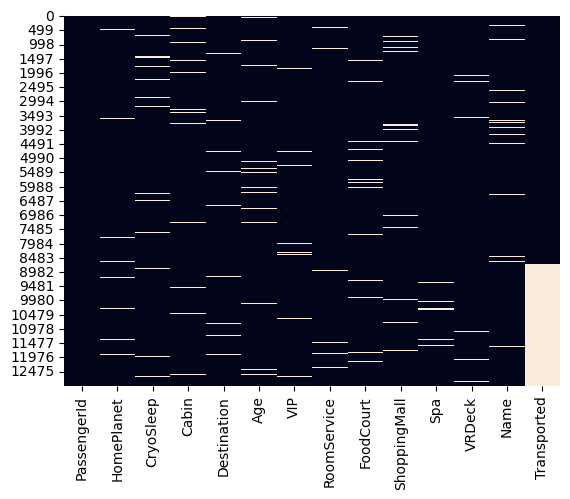

In [192]:
# missing value heatmap
sns.heatmap(data.isnull(), cbar=False)

In [193]:
numeric_features = data.select_dtypes(include=[np.number])

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
data_imputed = imputer.fit_transform(numeric_features)

<Axes: >

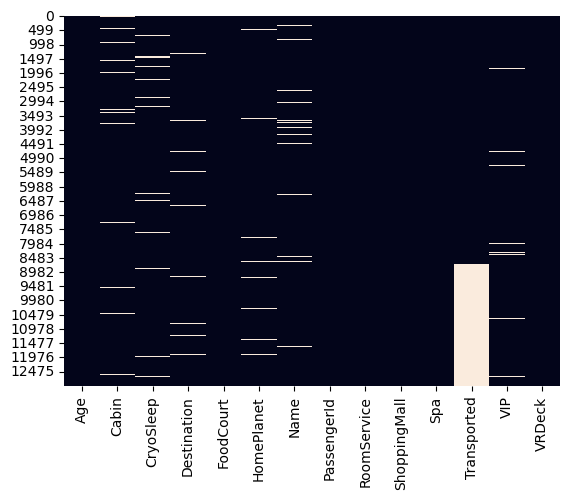

In [194]:
# Replace the imputed values into the original data
data_imputed = pd.DataFrame(data_imputed, columns=numeric_features.columns)

data = data.combine_first(data_imputed)
sns.heatmap(data.isnull(), cbar=False)

In [195]:
# split the cabin string A/B/C intro three seperate features.
data.Cabin = data.Cabin.fillna("U/-1/U")  # U and -1 for unknown values.
data[["Deck", "Num", "Side"]] = data.Cabin.str.split("/", expand=True)
data = data.drop(columns=["Cabin"])

data.head()

,Age,CryoSleep,Destination,FoodCourt,HomePlanet,Name,PassengerId,RoomService,ShoppingMall,Spa,Transported,VIP,VRDeck,Deck,Num,Side
0,39.0,False,TRAPPIST-1e,0.0,Europa,Maham Ofracculy,0001_01,0.0,0.0,0.0,False,False,0.0,B,0,P
1,24.0,False,TRAPPIST-1e,9.0,Earth,Juanna Vines,0002_01,109.0,25.0,549.0,True,False,44.0,F,0,S
2,58.0,False,TRAPPIST-1e,3576.0,Europa,Altark Susent,0003_01,43.0,0.0,6715.0,False,True,49.0,A,0,S
3,33.0,False,TRAPPIST-1e,1283.0,Europa,Solam Susent,0003_02,0.0,371.0,3329.0,False,False,193.0,A,0,S
4,16.0,False,TRAPPIST-1e,70.0,Earth,Willy Santantines,0004_01,303.0,151.0,565.0,True,False,2.0,F,1,S


In [196]:
data["LuxuryExpenditure"] = data[
    ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
].sum(axis=1)
data.head()

,Age,CryoSleep,Destination,FoodCourt,HomePlanet,Name,PassengerId,RoomService,ShoppingMall,Spa,Transported,VIP,VRDeck,Deck,Num,Side,LuxuryExpenditure
0,39.0,False,TRAPPIST-1e,0.0,Europa,Maham Ofracculy,0001_01,0.0,0.0,0.0,False,False,0.0,B,0,P,0.0
1,24.0,False,TRAPPIST-1e,9.0,Earth,Juanna Vines,0002_01,109.0,25.0,549.0,True,False,44.0,F,0,S,736.0
2,58.0,False,TRAPPIST-1e,3576.0,Europa,Altark Susent,0003_01,43.0,0.0,6715.0,False,True,49.0,A,0,S,10383.0
3,33.0,False,TRAPPIST-1e,1283.0,Europa,Solam Susent,0003_02,0.0,371.0,3329.0,False,False,193.0,A,0,S,5176.0
4,16.0,False,TRAPPIST-1e,70.0,Earth,Willy Santantines,0004_01,303.0,151.0,565.0,True,False,2.0,F,1,S,1091.0


In [197]:
# drop name as a predictor
data = data.drop(["Name"], axis=1)

In [198]:
# Parse group identity from PassengerId
data["Group"] = data["PassengerId"].apply(lambda x: str(x)[:-3])
data = data.drop(["PassengerId"], axis=1)

In [199]:
# one-hot encoding destination
data = pd.get_dummies(data, columns=["Destination"], prefix=["Dest"])

In [200]:
data = pd.get_dummies(data, columns=["HomePlanet"], prefix=["Home"])

In [201]:
data[["CryoSleep", "VIP"]] = data[["CryoSleep", "VIP"]].astype(bool)

In [202]:
data.head()

,Age,CryoSleep,FoodCourt,RoomService,ShoppingMall,Spa,Transported,VIP,VRDeck,Deck,Num,Side,LuxuryExpenditure,Group,Dest_55 Cancri e,Dest_PSO J318.5-22,Dest_TRAPPIST-1e,Home_Earth,Home_Europa,Home_Mars
0,39.0,False,0.0,0.0,0.0,0.0,False,False,0.0,B,0,P,0.0,0001,False,False,True,False,True,False
1,24.0,False,9.0,109.0,25.0,549.0,True,False,44.0,F,0,S,736.0,0002,False,False,True,True,False,False
2,58.0,False,3576.0,43.0,0.0,6715.0,False,True,49.0,A,0,S,10383.0,0003,False,False,True,False,True,False
3,33.0,False,1283.0,0.0,371.0,3329.0,False,False,193.0,A,0,S,5176.0,0003,False,False,True,False,True,False
4,16.0,False,70.0,303.0,151.0,565.0,True,False,2.0,F,1,S,1091.0,0004,False,False,True,True,False,False


In [204]:
data[["Deck", "Num", "Side", "Group"]] = data[["Deck", "Num", "Side", "Group"]].astype(
    "category"
)

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 12970 non-null  float64 
 1   CryoSleep           12970 non-null  bool    
 2   FoodCourt           12970 non-null  float64 
 3   RoomService         12970 non-null  float64 
 4   ShoppingMall        12970 non-null  float64 
 5   Spa                 12970 non-null  float64 
 6   Transported         8693 non-null   object  
 7   VIP                 12970 non-null  bool    
 8   VRDeck              12970 non-null  float64 
 9   Deck                12970 non-null  category
 10  Num                 12970 non-null  category
 11  Side                12970 non-null  category
 12  LuxuryExpenditure   12970 non-null  float64 
 13  Group               12970 non-null  category
 14  Dest_55 Cancri e    12970 non-null  bool    
 15  Dest_PSO J318.5-22  12970 non-null  

In [206]:
train_data = data[:train_data_len]
test_data = data[train_data_len:]

from sklearn.model_selection import train_test_split

train_data, validation_data = train_test_split(
    train_data, test_size=0.25, random_state=42
)

In [214]:
X_train = train_data.drop(["Transported"], axis=1)
y_train = train_data["Transported"].astype(bool)

X_validation = validation_data.drop(["Transported"], axis=1)
y_validation = validation_data["Transported"].astype(bool)

In [215]:
from xgboost import XGBClassifier

model = XGBClassifier(enable_categorical=True)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [219]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
)

y_pred = model.predict(X_validation)

print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.77      0.79      1082
        True       0.78      0.81      0.80      1092

    accuracy                           0.79      2174
   macro avg       0.79      0.79      0.79      2174
weighted avg       0.79      0.79      0.79      2174



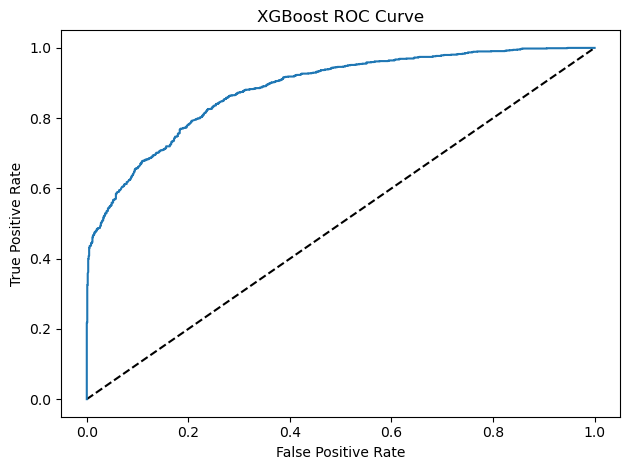

In [222]:
# plot roc curve
y_pred_prob = model.predict_proba(X_validation)[:, 1]
fpr, tpr, thresholds = roc_curve(y_validation, y_pred_prob)
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label="XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.tight_layout()

In [224]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter optimization
param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.1, 0.01, 0.001],
    "n_estimators": [100, 500, 1000],
}

# Create an XGBoost classifier
xgb_model = XGBClassifier(enable_categorical=True)

# Perform cross-validation and hyperparameter optimization
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_validation, y_validation)
print(f"Accuracy: {accuracy:.2f}")

In [226]:
best_params

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [227]:
param_grid = {
    "subsample": [0.3, 0.6, 1],
    "learning_rate": [0.1, 0.3, 0.5],
    "gamma": [0, 0.1],
}

# Create an XGBoost classifier
xgb_model = XGBClassifier(n_estimators=500, max_depth=3, enable_categorical=True)

# Perform cross-validation and hyperparameter optimization
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_validation, y_validation)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [229]:
print(classification_report(y_validation, best_model.predict(X_validation)))
print(roc_auc_score(y_validation, best_model.predict_proba(X_validation)[:, 1]))

              precision    recall  f1-score   support

       False       0.80      0.77      0.79      1082
        True       0.78      0.81      0.80      1092

    accuracy                           0.79      2174
   macro avg       0.79      0.79      0.79      2174
weighted avg       0.79      0.79      0.79      2174

0.8810023156141455


In [232]:
# submission

X_test = test_data.drop(["Transported"], axis=1)

In [233]:
y_test_pred = best_model.predict(X_test)

In [248]:
test_data_id = pd.read_csv("data/test.csv").PassengerId

submision = pd.DataFrame(
    {"PassengerId": test_data_id, "Transported": y_test_pred.astype(bool)}
)
submision.to_csv("submission.csv", index=False)